In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, execute
from qiskit.tools.visualization import plot_histogram

### Hadamard coin

In [55]:
n = 4
steps = 1

#

coin_qr = QuantumRegister(n)
pos_qr = QuantumRegister(n)
pos_cr = ClassicalRegister(n)
qc = QuantumCircuit(coin_qr, pos_qr, pos_cr)

for step in range(steps):
    for k in range(n):
        #qc.h(coin_qr[k])
        qc.ry(np.pi / 4, coin_qr[k])
        qc.cx(coin_qr[k], pos_qr[k])

qc.measure(pos_qr, pos_cr)

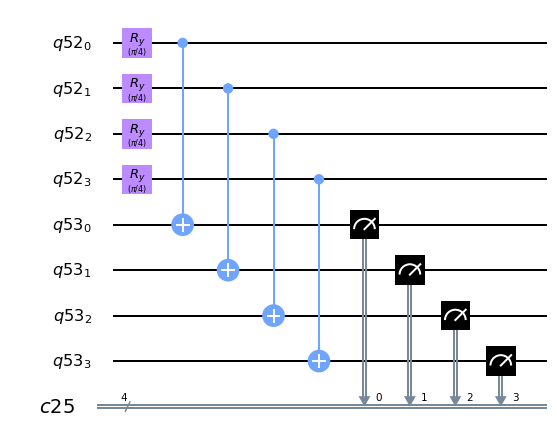

In [56]:
qc.draw(output="mpl")

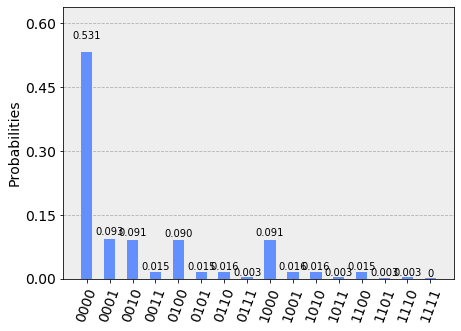

In [57]:
job = execute(qc, backend=BasicAer.get_backend("qasm_simulator"), shots=100000)
result = job.result()
plot_histogram(result.get_counts(qc))